<a href="https://colab.research.google.com/github/cullena20/emotion_detection/blob/main/EmotionDetectionPart1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection

## Loading the data

I'm loading the data here from the Kaggle competition that can be found at 
https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

I'm getting the data ready in a way that I don't fully understand from 
 https://www.kaggle.com/general/74235 and https://colab.research.google.com/drive/19b2aCs2mhaukM4lsvpLK4dIgaHJGRzgn#scrollTo=I4CsZ8Ihudzf.

This is a link with some usefl stuff about Colab's file system.

https://neptune.ai/blog/google-colab-dealing-with-files.

Drop kaggle.json here (from the kaggle API)

In [1]:
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                    title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
gpreda/covid-world-vaccination-progress                COVID-19 World Vaccination Progress                  37KB  2021-01-29 06:59:19           3811  
jorgesandoval/wind-power-generation                    Wind Power Generation Data                          245KB  2021-01-07 18:45:08            349  
google/android-smartphones-high-accuracy-datasets      Android smartphones high accuracy GNSS datasets       1GB  2020-12-23 01:51:11            715  
ayushggarg/all-trumps-twitter-insults-20152021         All Trump's Twitter insults (2015-2021)             581KB  2021-01-20 16:51:05            735  
cdminix/us-drought-meteorological-data                 US Dr

In [2]:
!kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 52% 10.0M/19.3M [00:00<00:00, 36.0MB/s]
100% 19.3M/19.3M [00:00<00:00, 64.6MB/s]
 94% 73.0M/77.3M [00:00<00:00, 51.4MB/s]
100% 77.3M/77.3M [00:01<00:00, 79.5MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 7.38MB/s]
 83% 76.0M/92.0M [00:01<00:00, 44.5MB/s]
100% 92.0M/92.0M [00:01<00:00, 79.2MB/s]
 97% 94.0M/96.6M [00:01<00:00, 68.1MB/s]
100% 96.6M/96.6M [00:01<00:00, 82.9MB/s]


In [3]:
!tar xvzf fer2013.tar.gz

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/


## Exploring the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('fer2013/fer2013.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


We can use Counter to examine our data. Perhaps the most important thing to note here is the distribution of different emotions in the dataset. There are very little images of disguist and the most images of happiness.


In [6]:
from collections import Counter
cnt = Counter()

In [7]:
print(Counter(df))
print(Counter(df['emotion']))
Counter(df['Usage'])

Counter({'emotion': 1, 'pixels': 1, 'Usage': 1})
Counter({3: 8989, 6: 6198, 4: 6077, 2: 5121, 0: 4953, 5: 4002, 1: 547})


Counter({'PrivateTest': 3589, 'PublicTest': 3589, 'Training': 28709})

In [8]:
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


Each image is represented as pixels like so.

In [9]:
df['pixels'][0]

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

6 Neutral


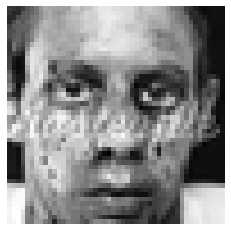

In [10]:
idx = np.random.randint(0, 35886)
image = df["pixels"][idx]
val = image.split(" ")
x_pixels = np.array(val, 'float32')
x_pixels /= 255
x_reshaped = x_pixels.reshape(48,48)
plt.imshow(x_reshaped, cmap= "gray", interpolation="nearest")
plt.axis("off")
emotion = df['emotion'][idx]
print(emotion, emotion_labels[emotion])

## Data preprocessing

There are some things we must do before we can train the model. The pixels right now are represented as space seperated integers and must be converted to numpy arrays. The data must be split into X and Y, and further into training and testing data. We may prefer to represent the Y as one hot encodings rather than as numbers from 0 - 6.

In [11]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler
import keras
from keras.utils import to_categorical

https://www.kaggle.com/drcapa/facial-expression-eda-cnn
This has some code I'm stealing.


In [12]:
# here's code I stole 
def prepare_data(data):
    """ Prepare data for modeling 
        input: data frame with labels und pixel data
        output: image and label array """
    
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image = np.divide(image, 255)
        image_array[i] = image
        
    return image_array, image_label

We'll test the prepare data function before actually using it for our data.

In [13]:
images, labels = prepare_data(df)
print(images.shape)
print(labels.shape)

(35887, 48, 48)
(35887,)


In [14]:
print(images[0])

[[0.2745098  0.31372549 0.32156863 ... 0.20392157 0.16862745 0.16078431]
 [0.25490196 0.23921569 0.22745098 ... 0.21960784 0.20392157 0.17254902]
 [0.19607843 0.16862745 0.21176471 ... 0.19215686 0.21960784 0.18431373]
 ...
 [0.35686275 0.25490196 0.16470588 ... 0.28235294 0.21960784 0.16862745]
 [0.30196078 0.32156863 0.30980392 ... 0.41176471 0.2745098  0.18039216]
 [0.30196078 0.28235294 0.32941176 ... 0.41568627 0.42745098 0.32156863]]


0 Angry


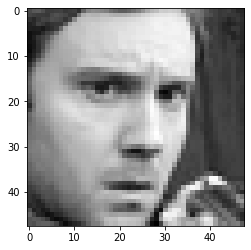

In [15]:
plt.imshow(images[0], cmap='gray')
print(labels[0], emotion_labels[labels[0]])
plt.show()

We can use one hot encoding to represent the labels.

In [16]:
one_hot_labels = keras.utils.to_categorical(labels, len(set(labels)))
one_hot_labels.shape

(35887, 7)

In [17]:
print(one_hot_labels[0])

[1. 0. 0. 0. 0. 0. 0.]


Now I will actually prepare the data. I will start with the training, test split. The Kaggle dataset labeled images as Training, PublicTest, and PrivateTest.

In [18]:
print(df[df['Usage'] == 'Training'].shape)
print(df[df['Usage'] == 'PrivateTest'].shape)
print(df[df['Usage'] == 'PublicTest'].shape)

(28709, 3)
(3589, 3)
(3589, 3)


In [19]:
# note that the prepare_data function is creating numpy arrays from pandas dataframes

X_train, y_train = prepare_data(df[df['Usage'] == 'Training'])
X_val, y_val = prepare_data(df[df['Usage'] == 'PrivateTest'])
X_test, y_test = prepare_data(df[df['Usage'] == 'PublicTest'])

In [20]:
y_train = keras.utils.to_categorical(y_train, len(set(y_train)))
y_val = keras.utils.to_categorical(y_val, len(set(y_val)))
y_test = keras.utils.to_categorical(y_test, len(set(y_test)))

In [21]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(28709, 48, 48) (28709, 7)
(3589, 48, 48) (3589, 7)
(3589, 48, 48) (3589, 7)


Expand the dimensions of our images to make them compatible with the VGG model.

In [22]:
X_train = np.expand_dims(X_train, 3)
X_val = np.expand_dims(X_val, 3)
X_test = np.expand_dims(X_test, 3)

In [23]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)


In [24]:
# stole this code from inspirit ai notebook

X_train = np.array([np.transpose(np.array([X_train[ix].squeeze() for i in range(3)]), (1,2,0)) for ix in range(len(X_train))])
X_val = np.array([np.transpose(np.array([X_val[ix].squeeze() for i in range(3)]), (1,2,0)) for ix in range(len(X_val))])
X_test = np.array([np.transpose(np.array([X_test[ix].squeeze() for i in range(3)]), (1,2,0)) for ix in range(len(X_test))])

In [25]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(28709, 48, 48, 3)
(3589, 48, 48, 3)
(3589, 48, 48, 3)


## Building the Model

I will be using the prebuilt VGG16 model and training it again on this dataset. This process is known as transfer learning. We are using the prebuilt layers of the model (an architecture that has been designed by researchers). Additionally, we are starting with pretrained weights from the imagenet database.

In [26]:
from keras.models import Sequential
from keras.layers import  MaxPooling2D, Dropout, Dense, GlobalAveragePooling2D
import keras.optimizers as optimizers
from keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint

In [27]:
# load the vgg network that is an 'expert' at 'imagenet' but do not include the FC layers
vgg_expert = VGG16(weights = 'imagenet', include_top = False, input_shape = (48, 48, 3))

# we start with the first layers of vgg and add them to our own model vgg_model
vgg_model = Sequential()
vgg_model.add(vgg_expert)

# and then add our own layers on top of it
vgg_model.add(GlobalAveragePooling2D())
vgg_model.add(Dense(1024, activation = 'relu'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(512, activation = 'relu'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(7, activation = 'sigmoid'))

# finally, we build the vgg model and turn it on so we can use it!
vgg_model.compile(loss = 'categorical_crossentropy', 
          optimizer = optimizers.SGD(lr=1e-4, momentum=0.95), 
          metrics=['accuracy'])

58892288/58889256 [==============================] - 0s 0us/step


In [28]:
vgg_expert.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [29]:
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 1024)              525312    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 3

In [30]:
# some hyperparameters plus checkpoint

batch_size = 64
epochs = 20 
checkpoint = ModelCheckpoint('emotion_detection_vgg.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')

This is pretty slow (take a look at the model and you'll see why). Make sure to take advantage of the Google Colab GPU (it crashed when I forget to do this).

In [31]:
vgg_history = vgg_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          callbacks=checkpoint,
          validation_data=(X_val, y_val),
          shuffle=True)

Epoch 1/20
449/449 [==============================] - 35s 61ms/step - loss: 1.8340 - accuracy: 0.2467 - val_loss: 1.5080 - val_accuracy: 0.4093

Epoch 00001: val_loss improved from inf to 1.50803, saving model to best_cnn_model.h5
Epoch 2/20
449/449 [==============================] - 27s 59ms/step - loss: 1.4847 - accuracy: 0.4310 - val_loss: 1.3155 - val_accuracy: 0.4940

Epoch 00002: val_loss improved from 1.50803 to 1.31554, saving model to best_cnn_model.h5
Epoch 3/20
449/449 [==============================] - 28s 62ms/step - loss: 1.3457 - accuracy: 0.4857 - val_loss: 1.2523 - val_accuracy: 0.5183

Epoch 00003: val_loss improved from 1.31554 to 1.25229, saving model to best_cnn_model.h5
Epoch 4/20
449/449 [==============================] - 28s 63ms/step - loss: 1.2563 - accuracy: 0.5246 - val_loss: 1.2139 - val_accuracy: 0.5372

Epoch 00004: val_loss improved from 1.25229 to 1.21386, saving model to best_cnn_model.h5
Epoch 5/20
449/449 [==============================] - 28s 63ms/s

The model improved consistently for 10 epochs, with some small improvements for the next ten.

## Exploring the results


In [32]:
# code stolen from insprit ai notebook
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_predicted):
  '''
  Plots the confusion Matrix
    input: true y values and predicted y values (one hot encoded)
    output: confusion
  '''
  cm = confusion_matrix(y_true, y_predicted)
  labels = list(emotion_labels.values())
  df_cm = pd.DataFrame(cm,index = labels,columns = labels)
  fig = plt.figure()
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
 
  plt.show()
  plt.close()

def plot_graphs(history):
  '''
  Plots the graph of training vs validation accuracy in loss over training
  epochs
    input: training history
    output: graph of training vs validation accuracy over training epochs
            graph of training vs validation loss over training epochs
  '''
  plt.figure(figsize=[10,4])
  # summarize history for accuracy
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  
  # summarize history for loss
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

In [33]:
vgg_performance = vgg_model.evaluate(X_test, y_test, batch_size=batch_size)

57/57 [==============================] - 1s 18ms/step - loss: 1.1019 - accuracy: 0.6392


In [34]:
print('Test Loss:', vgg_performance[0])
print('Test Accuracy:', vgg_performance[1])

Test Loss 1.1019232273101807
Test Accuracy 0.6391752362251282


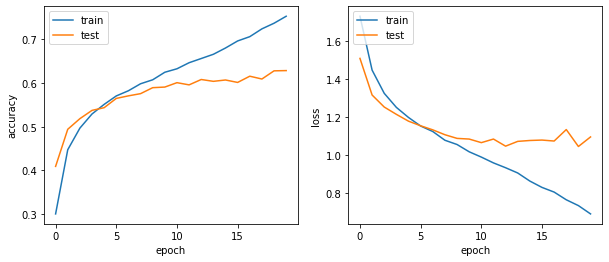

In [35]:
plot_graphs(vgg_history)

What can you take away from this confusion matrix?

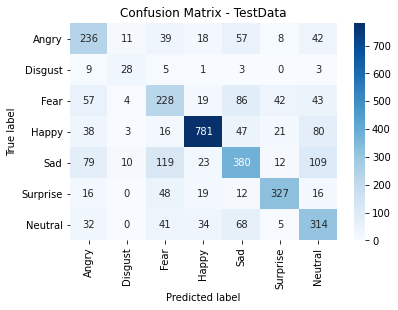

In [36]:
y_pred = np.argmax(vgg_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
plot_confusion_matrix(y_pred, y_true)

One interesting thing to note is our unbalanced dataset. For example, no disguist images showed up in our test data. Additionally, some of the false predictions may come from more ambiguous images (I believe the human accuracy is only around 65 %).

## Up Next

I definetly learned a lot through this. With the inspirit notebooks I learned more about emotion recognition and got additional practice creating a model. Here I did the same stuff (although I borrowed some functions) and went through the model creation process largely from beginning to end. I loaded the data from Kaggle and explored it and how it is represented. I preprocessed the data to get the data to be able to run through the vgg model. I had to go from pixels that was a string of 2304 space seperated numbers to a 48 * 48 * 3 dimensional representaion. I then trained a transfer learning model and examined the performance.

In doing all of this, I was able to get a better feel of the machine learning pipeline and how to go through it. I got some more experience with the representation and manipulating stuff in pandas and numpy. I should work on this more and be able to write the functions that I stole from scratch. Additionally, I got more practice working with data and interpreting results.

Now I will figure out how to run this model on any image and eventually turn it into a website
* Get a way to turn any image into a shape that can go through this model (48 * 48 * 3 pixels)
* Add to this notebook (or possibly a new one) with a section to do that.
* Learn how to use the model I already trained in another place (ex another notebook, Pycharm)
* Put together a website that can do this from a user submitted image. I would need to figure out how to get images from a user and run them through the model.
* Possibly extend this website with more features and cool ways to display image